In [1]:
!pip install pandas matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('infolimpioavanzadoTarget.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB
None


In [4]:
print(df.describe())

              open         high          low        close     adjclose  \
count  7781.000000  7781.000000  7781.000000  7781.000000  7781.000000   
mean     34.990220    35.655999    34.301243    34.964414    34.483147   
std      99.841502   101.451058    98.073945    99.790823    98.603879   
min       0.410000     0.435000     0.405000     0.408000     0.408000   
25%       4.050000     4.130000     3.980000     4.030000     3.960000   
50%      10.080000    10.110000    10.005000    10.080000    10.061000   
75%      24.350000    24.500000    24.080000    24.250000    22.466007   
max     795.739990   799.359985   784.960022   797.489990   783.376221   

             volume  RSIadjclose15  RSIvolume15  RSIadjclose25  RSIvolume25  \
count  7.781000e+03    7316.000000  7316.000000    7006.000000  7006.000000   
mean   7.586022e+05      46.817434    49.814790      46.966016    49.898659   
std    3.934491e+06      11.672838     5.002664       8.760961     3.420371   
min    0.000000e+

In [5]:
print(df.head())

         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN             

In [6]:
print(df.isnull().sum())

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64


In [7]:
print(df.duplicated().sum())

0


In [8]:
print(df.columns)

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)


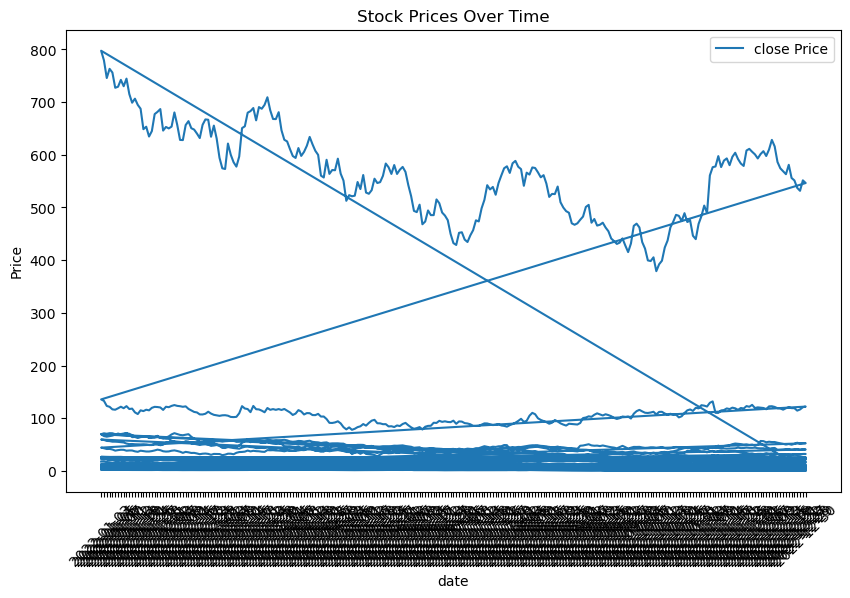

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='close Price')
plt.xlabel('date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

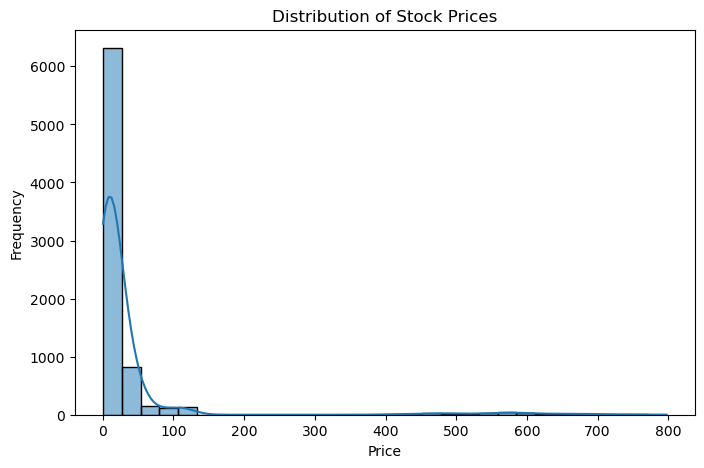

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['close'], bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Stock Prices')
plt.show()

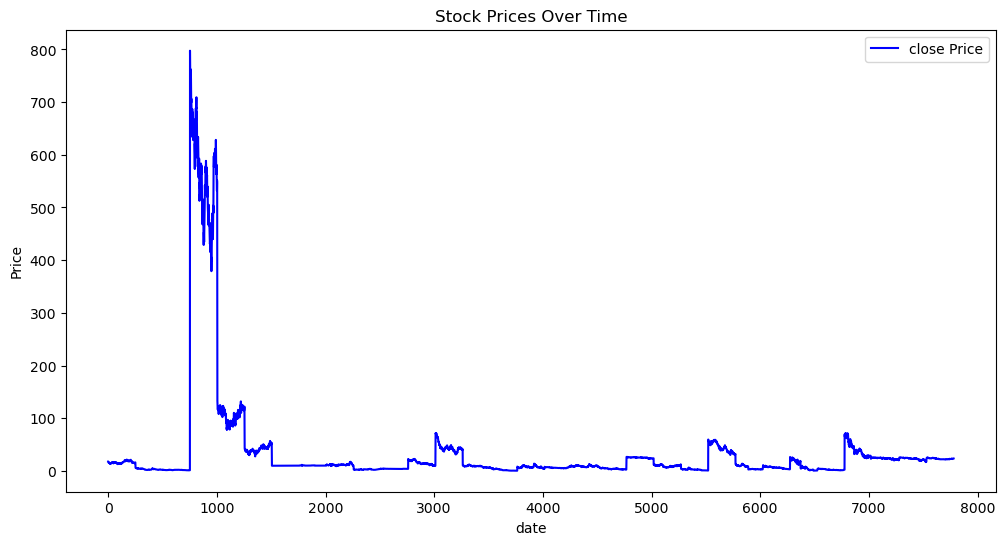

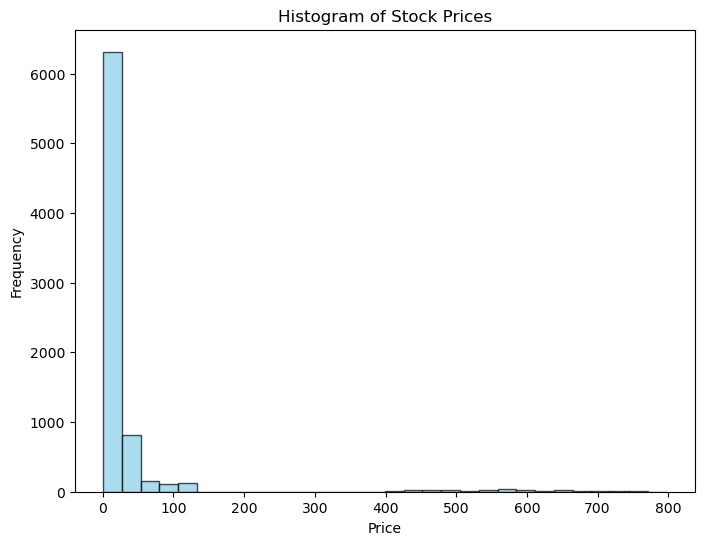

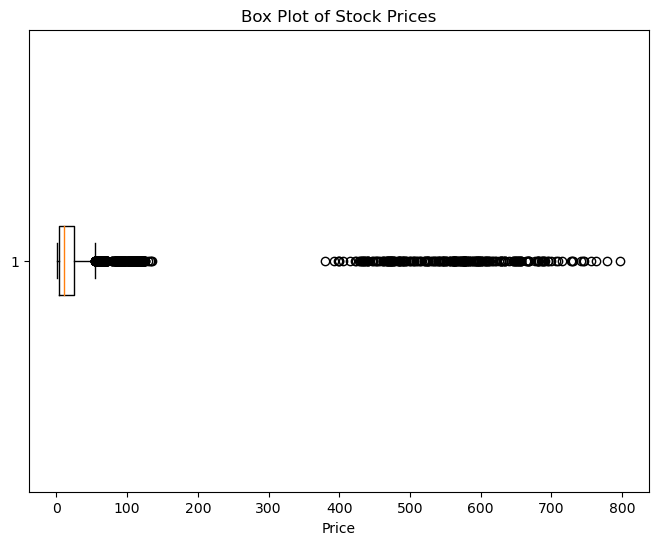

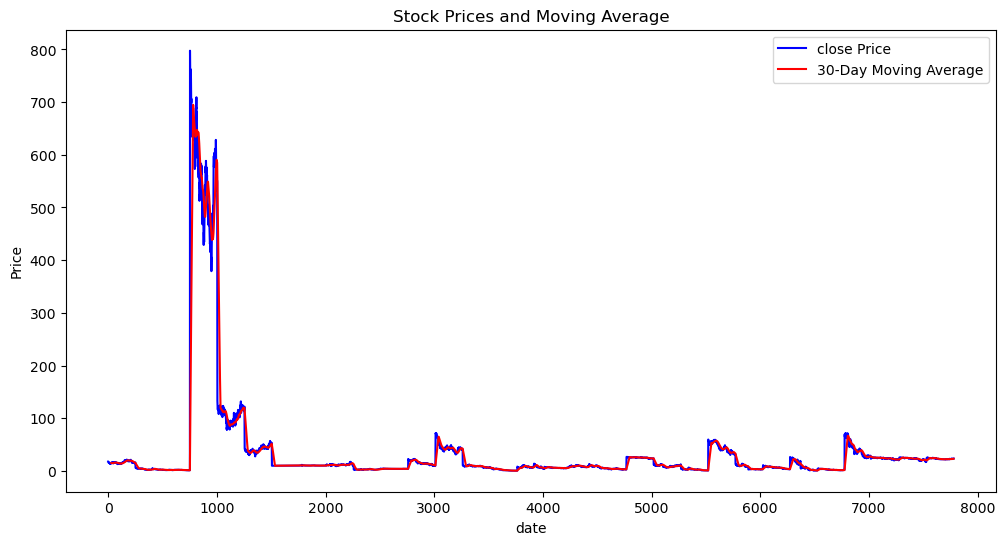

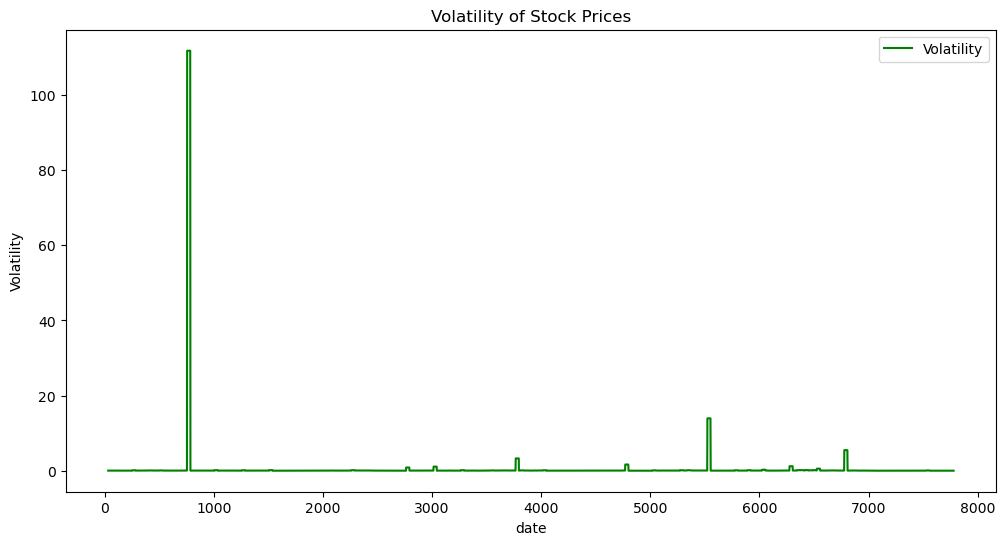

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='close Price', color='blue')
plt.xlabel('date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df['close'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Stock Prices')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['close'], vert=False)
plt.xlabel('Price')
plt.title('Box Plot of Stock Prices')
plt.show()

window_size = 30
rolling_avg = df['close'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='close Price', color='blue')
plt.plot(df.index, rolling_avg, label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel('date')
plt.ylabel('Price')
plt.title('Stock Prices and Moving Average')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'].pct_change().rolling(window=window_size).std(), label='Volatility', color='green')
plt.xlabel('date')
plt.ylabel('Volatility')
plt.title('Volatility of Stock Prices')
plt.legend()
plt.show()


In [17]:


data = pd.read_csv('infolimpioavanzadoTarget.csv')

X = data[['open', 'high', 'low', 'volume']]
y = data['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

next_day_low = 100.0 

next_day_features = np.array([[next_day_open, next_day_high, next_day_low, next_day_volume]])

next_day_prediction = model.predict(next_day_features)
print("Predicted Next Day Stock Price:", next_day_prediction)

Mean Squared Error: 1.0350515890549798
Predicted Next Day Stock Price: [107.45837622]


In [13]:
imputer = SimpleImputer(strategy='mean') 
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


model = LinearRegression()
model.fit(X_train_imputed, y_train)

y_pred = model.predict(X_test_imputed)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 2.933733773932784
